In [1]:
#Linking drive to colab to store datasets
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Failed to fetch http://archive.ubuntu.com/ubuntu/pool/main/d/distro-info-data/distro-info-data_0.36ubuntu0.1_all.deb  404  Not Found [IP: 91.189.88.162 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?
/bin/sh: 1: add-apt-repository: not found
E: Unable to locate package google-drive-ocamlfuse


In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [4]:
# Generate creds for the Drive FUSE library. Though the link asks you to verify twice, you don't have to!
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [5]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

print ('Files in Drive:')
!ls drive/

Files in Drive:
attributes.txt	 DL#3_EDA.ipynb     rules.docx	       train.csv
classes.txt	 kaggle		    StudentGrades.xls  train_img
Colab Notebooks  Module 01	    test.csv	       train_img.zip
created.txt	 Presentation.pptx  test_img	       weights.best.eda.hdf5


In [0]:
# Create a file in a new directory called "Kaggle" in your Google Drive. This will be your operation base :P
!echo "This newly created file will appear in your Drive file list. If you are reading this, that means the attempt to integrate was successful" > drive/kaggle/created.txt

In [9]:
#The uploaded files are in .zip format. The following code will unzip them into nice json files. This has to be done only the first time!
#!unzip "drive/kaggle/*.zip" -d drive/kaggle

#Now, remove those archives
#!rm -f drive/kaggle/*.zip

#Make directories for the data
!mkdir drive/kaggle/train drive/kaggle/validation drive/kaggle/test

mkdir: cannot create directory ‘drive/kaggle/train’: File exists
mkdir: cannot create directory ‘drive/kaggle/validation’: File exists
mkdir: cannot create directory ‘drive/kaggle/test’: File exists


In [14]:
#Now, to download the train set into your drive from the urls in the JSON files, execute the below.  Also, a file is generated with the ImageURL, imageName, imageId and 
#their labelIds.


import json
import time

train_data = json.load(open('drive/kaggle/train.json'))
!echo ImageURL, ImgName, ImgId, LabelId >> drive/kaggle/train/train.txt

for i in range(5825,5827):
  img_url = train_data['images'][i]['url']
  img_id = train_data['images'][i]['imageId']
  label_id = train_data['annotations'][i]['labelId']
  img_name="Image-"+str(i)
  #print img_name
  #img_name_actual = img_name.split("-")[0]
  img_name_large = img_name+".jpg"
  #print img_name_actual
  img_url_large = img_url.split("-")[-2]
  img_url_large = img_url_large + "-large"
  print (img_url_large)
  !curl $img_url_large > drive/kaggle/train/$img_name_large
  time.sleep(0.05) 
  !echo $img_url_large,$img_name_large,$img_id,$label_id >> drive/kaggle/train/train.txt 
  #time.sleep(0.5)

OSError: ignored

In [0]:
#To download validation data on to your drive...

import json
import time

val_data = json.load(open('drive/kaggle/validation.json'))
!echo ImageURL, ImgName, ImgId, LabelId >> drive/kaggle/validation/validation.txt 

for i in range(len(val_data['images'])):
  img_url = val_data['images'][i]['url']
  #print img_url
  img_id = val_data['images'][i]['imageId']
  #print img_id
  label_id = val_data['annotations'][i]['labelId']
  #print label_id
  img_name=img_url.split("/")[-1]
  #print img_name
  img_name_actual = img_name.split("-")[0]
  img_name_small = img_name_actual + "-small"+".jpg"
  #print img_name_actual
  img_url_small = img_url.split("-")[-2]
  img_url_small = img_url_small + "-small"
  print img_url_small
  !curl $img_url_small > drive/kaggle/validation/$img_name_small
  time.sleep(0.05)
  !echo $img_name_actual,$img_id,$label_id >> drive/kaggle/validation/validation.txt 
  #time.sleep(0.05)

In [0]:
#And this is for downloading test data into your drive

import json
import time

test_data = json.load(open('drive/kaggle/test.json'))
#print len(test_data['images'])

for i in range(len(test_data['images'])):
  img_url = test_data['images'][i]['url']
  #print img_url
  img_id = test_data['images'][i]['imageId']
  #print img_id
  img_name=img_url.split("/")[-1]
  #print img_name
  img_name_actual = img_name.split("-")[0]
  img_name_small = img_name_actual + "-small"+".jpg"
  #print img_name_actual
  img_url_small = img_url.split("-")[-2]
  img_url_small = img_url_small + "-small"
  print img_url_small
  !curl $img_url_small > drive/kaggle/test/$img_name_small
  time.sleep(0.05)

In [76]:
# 1. Load data =================================================================

import time
import json
script_start_time = time.time()

import pandas as pd
import numpy as np
print('%0.2f min: Start loading data'%((time.time() - script_start_time)/60))

train={}
test={}
validation={}
with open('/home/yash/Desktop/Fashion prediction/input/train.json') as json_data:
    train= json.load(json_data)
#with open('/home/yash/Desktop/Fashion prediction/input/test.json') as json_data:
    #test= json.load(json_data)
#with open('/home/yash/Desktop/Fashion prediction/input/validation.json') as json_data:
    #validation = json.load(json_data)

print('Train No. of images: %d'%(len(train['images'])))
#print('Test No. of images: %d'%(len(test['images'])))
#print('Validation No. of images: %d'%(len(validation['images'])))

# JSON TO PANDAS DATAFRAME
# train data
train_img_url=train['images']
train_img_url=pd.DataFrame(train_img_url)
trin_img_url=train_img_url[0:9752]
train_ann=train['annotations']
train_ann=pd.DataFrame(train_ann)
train_ann=train_ann[0:9752]
train=pd.merge(train_img_url, train_ann, on='imageId', how='inner')
train=train[0:9752]

# test data
#test=pd.DataFrame(test['images'])

# Validation Data
#val_img_url=validation['images']
#val_img_url=pd.DataFrame(val_img_url)
#val_ann=validation['annotations']
#val_ann=pd.DataFrame(val_ann)
#validation=pd.merge(val_img_url, val_ann, on='imageId', how='inner')

datas = {'Train': train}
for data in datas.values():
    data['imageId'] = data['imageId'].astype(np.uint32)

print('%0.2f min: Finish loading data'%((time.time() - script_start_time)/60))
print('='*50)

0.00 min: Start loading data
Train No. of images: 1014544
0.15 min: Finish loading data


In [8]:
i

TypeError: ignored

In [77]:
print('%0.2f min: Start converting label'%((time.time() - script_start_time)/60))
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
train_label = mlb.fit_transform(train['labelId'])
#validation_label = mlb.transform(validation['labelId'])
dummy_label_col = list(mlb.classes_)
print(dummy_label_col)
print('%0.2f min: Finish converting label'%((time.time() - script_start_time)/60))

for data in [train_label, test]:
    print(data.shape)

0.20 min: Start converting label
['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '157', '158', '159', '160', '161', '162', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '224', '225', '226', '227', '228', '23', '24

AttributeError: 'dict' object has no attribute 'shape'

In [86]:

dummy_label_col = pd.DataFrame(columns = dummy_label_col)
# dummy_label_col.to_csv('%s/dummy_label_col.csv'%'', index = False)
# np.save('%s/dummy_label_train.npy' % '', train_label)
# np.save('%s/dummy_label_val.npy' % '', validation_label)
dummy_label_col.head()

""


In [87]:


# Save as csv if you prefer
train_label = pd.DataFrame(data = train_label, columns = list(mlb.classes_))
train_label.head()
#validation_label = pd.DataFrame(data = validation_label, columns = list(mlb.classes_))
#validation_label.head()



,1,10,100,101,102,103,104,105,106,107,...,9,90,91,92,93,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
train_label.head()


,1,10,100,101,102,103,104,105,106,107,...,9,90,91,92,93,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
train.head()


,imageId,url,labelId
0,1,https://contestimg.wish.com/api/webimage/570f3...,"[95, 66, 137, 70, 20]"
1,2,https://contestimg.wish.com/api/webimage/5468f...,"[36, 66, 44, 214, 105, 133]"
2,3,https://contestimg.wish.com/api/webimage/54641...,"[170, 66, 97, 153, 105, 138]"
3,4,https://contestimg.wish.com/api/webimage/550b9...,"[18, 66, 44, 153, 164]"
4,5,https://contestimg.wish.com/api/webimage/54451...,"[189, 66, 176, 137, 153, 74, 181, 171, 138]"


In [7]:
# Shape of training and test datasets
print ('Training dataset consists of {} images with {} attributes'.format(train_label.shape[0], train_label.shape[1]-1))
# Shape of training and test datasets
#print ('Testing dataset consists of {} images.'.format(test.shape[0]))

Training dataset consists of 9752 images with 220 attributes


In [88]:
cols = list(train_label.columns)
cols.sort()
count_labels = train_label[cols].sum()

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from glob import glob
%matplotlib inline

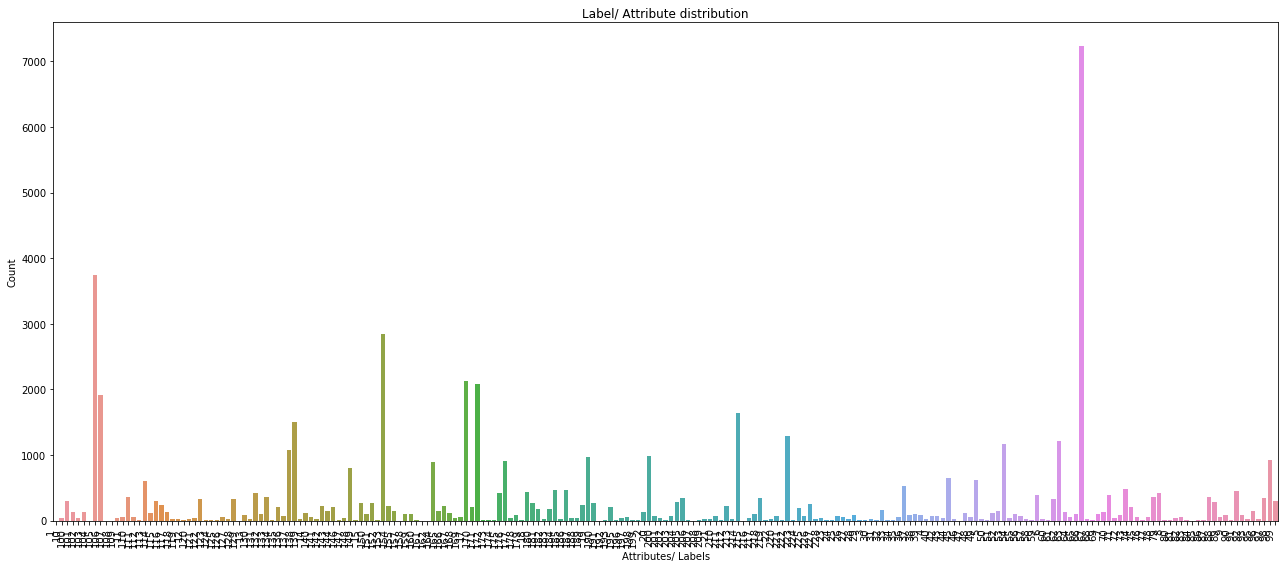

In [10]:
plt.figure(figsize=(18, 8))
ax = sns.barplot(x=count_labels.index, y=count_labels.values)
ax.set_xticklabels(labels=count_labels.index,rotation=90, ha='right')
ax.set_ylabel('Count')
ax.set_xlabel('Attributes/ Labels')
ax.title.set_text('Label/ Attribute distribution')
plt.tight_layout()

In [11]:
TRAIN_PATH = '/home/yash/Desktop/Fashion prediction/train_file/'

In [40]:
image_path=TRAIN_PATH+"Image-"+str(0)+".jpg"
print(image_path)

/home/yash/Desktop/Fashion prediction/train_file//home/yash/Desktop/Fashion prediction/train_file/1


In [41]:
from PIL import Image
import cv2

In [42]:
Image.open(image_path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/yash/Desktop/Fashion prediction/train_file//home/yash/Desktop/Fashion prediction/train_file/1'

In [38]:
img = cv2.imread(image_path)
img

array([[[230, 235, 244],
        [230, 235, 244],
        [230, 235, 244],
        ...,
        [208, 215, 224],
        [208, 215, 224],
        [208, 215, 224]],

       [[230, 235, 244],
        [230, 235, 244],
        [230, 235, 244],
        ...,
        [207, 214, 223],
        [207, 214, 223],
        [207, 214, 223]],

       [[230, 235, 244],
        [230, 235, 244],
        [230, 235, 244],
        ...,
        [206, 213, 222],
        [206, 213, 222],
        [206, 213, 222]],

       ...,

       [[ 98, 114, 143],
        [ 93, 109, 138],
        [ 97, 111, 140],
        ...,
        [ 73,  86, 118],
        [ 68,  81, 113],
        [ 67,  80, 112]],

       [[ 98, 114, 143],
        [ 93, 109, 138],
        [ 97, 111, 140],
        ...,
        [ 77,  90, 122],
        [ 70,  83, 115],
        [ 66,  79, 111]],

       [[ 98, 114, 143],
        [ 93, 109, 138],
        [ 97, 111, 140],
        ...,
        [ 81,  94, 126],
        [ 72,  85, 117],
        [ 68,  81, 113]]

In [39]:
img.shape

(500, 500, 3)

/home/yash/Desktop/Fashion prediction/train_file/Image-1.jpg


In [66]:
train_img = []
for i in range(0,9752):
  img=cv2.imread(TRAIN_PATH+"Image-"+str(i)+".jpg")
  img = cv2.resize(img, (64,64))
  progress=(i/9752)*100
  print(progress,end="\r")
  
  train_img.append(img)

In [67]:
import numpy as np
X_train = np.array(train_img, np.float32) / 255.

In [68]:
print(train_img[0])

[[[230 235 244]
  [231 236 245]
  [230 234 245]
  ...
  [208 214 224]
  [205 212 221]
  [206 213 222]]

 [[230 235 244]
  [231 236 245]
  [229 233 244]
  ...
  [206 213 222]
  [205 212 221]
  [204 211 220]]

 [[233 235 245]
  [232 234 244]
  [228 233 242]
  ...
  [199 205 216]
  [197 203 214]
  [199 205 216]]

 ...

 [[ 98 113 145]
  [ 89 106 140]
  [ 95 109 141]
  ...
  [ 74  85 117]
  [ 91 102 134]
  [ 70  83 112]]

 [[ 95 112 142]
  [ 90 109 142]
  [106 125 160]
  ...
  [ 95 105 139]
  [ 92 103 135]
  [ 73  85 117]]

 [[ 96 110 141]
  [ 94 110 143]
  [111 127 164]
  ...
  [ 88 100 131]
  [ 78  90 121]
  [ 80  92 125]]]


In [69]:
import gc
del train_img
gc.collect()

6773

In [70]:
mean_img = X_train.mean(axis=0)

In [71]:
std_dev = X_train.std(axis = 0)

In [72]:

X_norm = (X_train - mean_img)/ std_dev



In [73]:
X_norm.shape

(9752, 64, 64, 3)

In [74]:

del X_train
gc.collect()





0

In [90]:
print(train_label)

      1  10  100  101  102  103  104  105  106  107 ...  9  90  91  92  93  \
0     0   0    0    0    0    0    0    0    0    0 ...  0   0   0   0   0   
1     0   0    0    0    0    0    0    1    0    0 ...  0   0   0   0   0   
2     0   0    0    0    0    0    0    1    0    0 ...  0   0   0   0   0   
3     0   0    0    0    0    0    0    0    0    0 ...  0   0   0   0   0   
4     0   0    0    0    0    0    0    0    0    0 ...  0   0   0   0   0   
5     0   0    0    0    0    0    0    0    1    0 ...  0   0   0   0   0   
6     0   0    0    0    0    0    0    0    0    0 ...  0   0   0   0   0   
7     0   0    0    0    0    0    0    1    0    0 ...  0   0   0   0   0   
8     0   0    0    0    0    0    0    1    0    0 ...  0   0   0   0   0   
9     0   0    0    0    0    0    0    1    0    0 ...  0   0   1   0   0   
10    0   0    0    0    0    0    0    0    0    0 ...  0   0   0   0   0   
11    0   0    0    0    0    0    0    0    0    0 ...  0   0  

In [91]:

y = train_label



In [92]:
print(y)

      1  10  100  101  102  103  104  105  106  107 ...  9  90  91  92  93  \
0     0   0    0    0    0    0    0    0    0    0 ...  0   0   0   0   0   
1     0   0    0    0    0    0    0    1    0    0 ...  0   0   0   0   0   
2     0   0    0    0    0    0    0    1    0    0 ...  0   0   0   0   0   
3     0   0    0    0    0    0    0    0    0    0 ...  0   0   0   0   0   
4     0   0    0    0    0    0    0    0    0    0 ...  0   0   0   0   0   
5     0   0    0    0    0    0    0    0    1    0 ...  0   0   0   0   0   
6     0   0    0    0    0    0    0    0    0    0 ...  0   0   0   0   0   
7     0   0    0    0    0    0    0    1    0    0 ...  0   0   0   0   0   
8     0   0    0    0    0    0    0    1    0    0 ...  0   0   0   0   0   
9     0   0    0    0    0    0    0    1    0    0 ...  0   0   1   0   0   
10    0   0    0    0    0    0    0    0    0    0 ...  0   0   0   0   0   
11    0   0    0    0    0    0    0    0    0    0 ...  0   0  

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [94]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_norm, y, test_size=0.25, random_state=47)

In [95]:
del X_norm
gc.collect()

129

In [96]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [97]:
gc.collect()

0

In [98]:
model = Sequential()
model.add(BatchNormalization(input_shape=Xtrain.shape[1:]))
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu',padding= 'same'))
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(221, activation='sigmoid'))

In [99]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 64, 64, 3)         12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        36928     
__________

In [100]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')
checkpointer = ModelCheckpoint(filepath='weights.best.eda.hdf5', verbose=1, save_best_only=True)

In [103]:
model.fit(Xtrain, ytrain, validation_data=(Xvalid, yvalid), epochs=60, batch_size=40, callbacks=[checkpointer], verbose=1)

Train on 7314 samples, validate on 2438 samples
Epoch 1/60
7314/7314 [==============================] - 6s 843us/step - loss: 0.0909 - acc: 0.9761 - val_loss: 0.0860 - val_acc: 0.9759

Epoch 00001: val_loss improved from 0.08611 to 0.08601, saving model to weights.best.eda.hdf5
Epoch 2/60
7314/7314 [==============================] - 6s 780us/step - loss: 0.0902 - acc: 0.9761 - val_loss: 0.0862 - val_acc: 0.9759

Epoch 00002: val_loss did not improve from 0.08601
Epoch 3/60
7314/7314 [==============================] - 6s 783us/step - loss: 0.0900 - acc: 0.9761 - val_loss: 0.0860 - val_acc: 0.9759

Epoch 00003: val_loss did not improve from 0.08601
Epoch 4/60
7314/7314 [==============================] - 6s 774us/step - loss: 0.0896 - acc: 0.9761 - val_loss: 0.0853 - val_acc: 0.9760

Epoch 00004: val_loss improved from 0.08601 to 0.08535, saving model to weights.best.eda.hdf5
Epoch 5/60
7314/7314 [==============================] - 6s 784us/step - loss: 0.0888 - acc: 0.9763 - val_loss: 0.0

7314/7314 [==============================] - 6s 758us/step - loss: 0.0755 - acc: 0.9782 - val_loss: 0.0750 - val_acc: 0.9780

Epoch 00038: val_loss improved from 0.07541 to 0.07504, saving model to weights.best.eda.hdf5
Epoch 39/60
7314/7314 [==============================] - 6s 765us/step - loss: 0.0752 - acc: 0.9782 - val_loss: 0.0751 - val_acc: 0.9779

Epoch 00039: val_loss did not improve from 0.07504
Epoch 40/60
7314/7314 [==============================] - 6s 767us/step - loss: 0.0749 - acc: 0.9783 - val_loss: 0.0757 - val_acc: 0.9778

Epoch 00040: val_loss did not improve from 0.07504
Epoch 41/60
7314/7314 [==============================] - 6s 769us/step - loss: 0.0747 - acc: 0.9783 - val_loss: 0.0751 - val_acc: 0.9779

Epoch 00041: val_loss did not improve from 0.07504
Epoch 42/60
7314/7314 [==============================] - 6s 770us/step - loss: 0.0745 - acc: 0.9783 - val_loss: 0.0751 - val_acc: 0.9779

Epoch 00042: val_loss did not improve from 0.07504
Epoch 43/60
7314/7314 [=

In [104]:
train_pred = model.predict(Xtrain).round()

In [105]:
f1_score(ytrain, train_pred, average='samples')

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


0.4117560946473266

In [106]:

valid_pred = model.predict(Xvalid).round()

In [108]:
f1_score(yvalid, valid_pred, average='samples')

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


0.3596987684070877